In [1]:
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.DataStructs import ConvertToNumpyArray

In [2]:
def show_scatter(data: np.ndarray, color: np.ndarray):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('white')
    ff = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=color)
    plt.colorbar(ff)
    plt.show()

In [3]:
def compute_fingerprints(path: str, fp_radius: int = 2, nBits: int = 512) -> np.ndarray:
    fps = []
    text = Path(path).read_text()
    for line in text.rstrip().split("\n"):
        if line[0] == "C": # SMILES string here
            smiles = line.split()[0] # Everything before the empty space is the SMILES string.
            mol = Chem.MolFromSmiles(smiles) # Create molecule object from smile
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, fp_radius, nBits=nBits)
            arr = np.zeros((0,), dtype=np.int8)
            ConvertToNumpyArray(fp, arr)
            fps.append(arr)
    return np.array(fps)

In [4]:
fps = compute_fingerprints("CapsaicinHead.txt", nBits=1024)
fps.shape

(145, 1024)

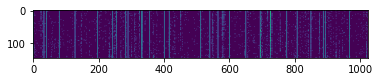

In [5]:
plt.imshow(fps)

In [6]:
row_count = fps.sum(axis=0)
col_count = fps.sum(axis=1)
row_count.shape, col_count.shape

((1024,), (145,))

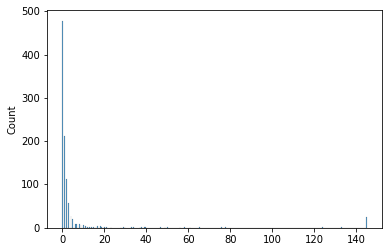

<AxesSubplot:ylabel='Count'>

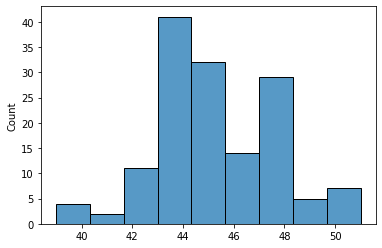

In [7]:
sns.histplot(row_count)
plt.show()
sns.histplot(col_count)

In [8]:
fp_sum = fps.sum(axis=1)
z = (fp_sum - fp_sum.mean()) / fp_sum.std()
z.shape

(145,)

<AxesSubplot:ylabel='Count'>

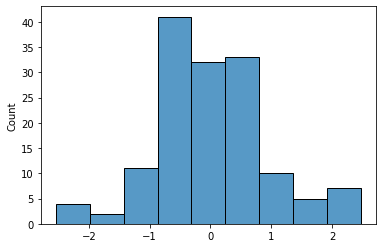

In [9]:
sns.histplot(z)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(fps)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
proj = pca.fit_transform(fps)

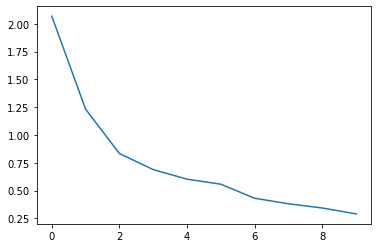

In [12]:
plt.plot(pca.explained_variance_)

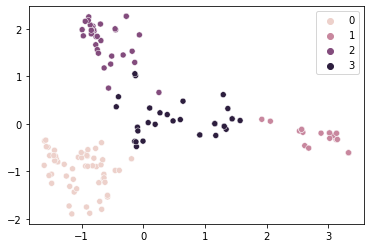

<AxesSubplot:>

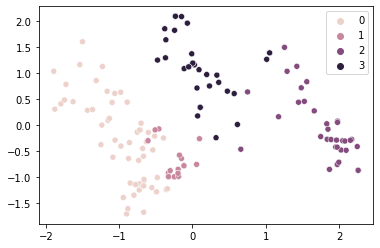

In [13]:
sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=kmeans.labels_)
plt.show()
sns.scatterplot(x=proj[:, 1], y=proj[:, 2], hue=kmeans.labels_)

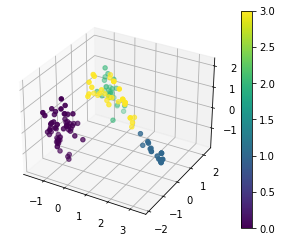

In [14]:
show_scatter(proj[:, :3], color=kmeans.labels_)

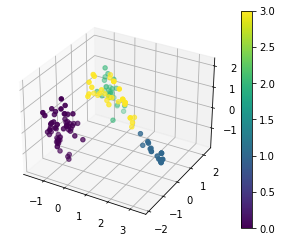

In [15]:
show_scatter(proj[:, :3], color=kmeans.labels_)

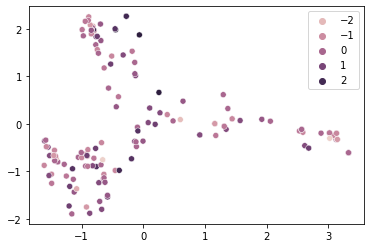

<AxesSubplot:>

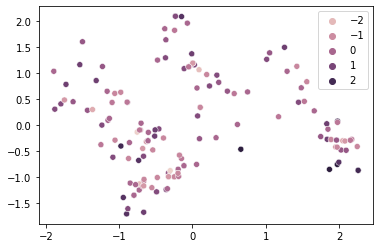

In [16]:
sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=z)
plt.show()
sns.scatterplot(x=proj[:, 1], y=proj[:, 2], hue=z)

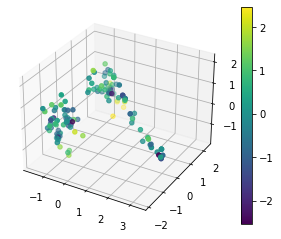

In [17]:
show_scatter(proj[:, :3], color=z)